<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Practice_6%20for%205%20class%20in%20DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Data Preprocessing**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
# Load dataset
dataset = pd.read_csv("dataset_WSN-DS.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374661 entries, 0 to 374660
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0    id               374661 non-null  int64  
 1    Time             374661 non-null  int64  
 2    Is_CH            374661 non-null  int64  
 3    who CH           374661 non-null  int64  
 4    Dist_To_CH       374661 non-null  float64
 5    ADV_S            374661 non-null  int64  
 6    ADV_R            374661 non-null  int64  
 7    JOIN_S           374661 non-null  int64  
 8    JOIN_R           374661 non-null  int64  
 9    SCH_S            374661 non-null  int64  
 10   SCH_R            374661 non-null  int64  
 11  Rank              374661 non-null  int64  
 12   DATA_S           374661 non-null  int64  
 13   DATA_R           374661 non-null  int64  
 14   Data_Sent_To_BS  374661 non-null  int64  
 15   dist_CH_To_BS    374661 non-null  float64
 16   send_code        37

In [4]:
# Separate target variable from features
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1).values

### **Data normalization**

In [5]:
# Data normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

### **Data Balancing**

In [6]:
# Oversample minority classes using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

**Splitting Data (80:20 ratio)**

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Convolutional Neural Networks (CNN) for 5 class classifications**

In [8]:
# Reshape input data for CNN model
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Define CNN model
model = keras.Sequential([
    keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    keras.layers.MaxPooling1D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=5, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/15
34007/34007 [==============================] - 109s 3ms/step - loss: 0.1562 - accuracy: 0.9303 - val_loss: 0.1139 - val_accuracy: 0.9529
Epoch 2/15
34007/34007 [==============================] - 107s 3ms/step - loss: 0.0973 - accuracy: 0.9601 - val_loss: 0.0876 - val_accuracy: 0.9673
Epoch 3/15
34007/34007 [==============================] - 113s 3ms/step - loss: 0.0758 - accuracy: 0.9700 - val_loss: 0.0844 - val_accuracy: 0.9717
Epoch 4/15
34007/34007 [==============================] - 114s 3ms/step - loss: 0.0659 - accuracy: 0.9753 - val_loss: 0.0695 - val_accuracy: 0.9728
Epoch 5/15
34007/34007 [==============================] - 113s 3ms/step - loss: 0.0582 - accuracy: 0.9788 - val_loss: 0.0491 - val_accuracy: 0.9820
Epoch 6/15
34007/34007 [==============================] - 108s 3ms/step - loss: 0.0534 - accuracy: 0.9805 - val_loss: 0.0459 - val_accuracy: 0.9835
Epoch 7/15
34007/34007 [==============================] - 106s 3ms/step - loss: 0.0496 - accuracy: 0.9818 - val_

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

10628/10628 [==============================] - 18s 2ms/step
Confusion Matrix:
[[67058    83     0   518    86]
 [   26 67096  1019     3     0]
 [    0   366 67916     0     0]
 [ 2359     6     0 65641     3]
 [   14     0     0     2 67870]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     67745
           1       0.99      0.98      0.99     68144
           2       0.99      0.99      0.99     68282
           3       0.99      0.97      0.98     68009
           4       1.00      1.00      1.00     67886

    accuracy                           0.99    340066
   macro avg       0.99      0.99      0.99    340066
weighted avg       0.99      0.99      0.99    340066



In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Blackhole','Grayhole','Flooding','TDMA'])
  ax.yaxis.set_ticklabels(['Normal','Blackhole','Grayhole','Flooding','TDMA'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

Confusion Matrix of Convolutional Neural Networks (CNN)


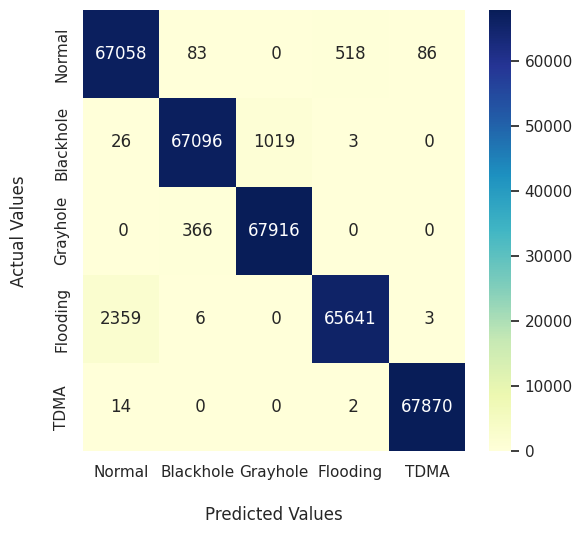

In [24]:
print("Confusion Matrix of Convolutional Neural Networks (CNN)") 
conf_mat(y_test, predicted_classes)

### **Recurrent Neural Networks (RNN)**

In [ ]:
#define the RNN model:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

#compile and fit the model:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=15, batch_size=64, validation_data=(X_test, y_test))


# Train model
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2)

# Evaluate model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/15
21255/21255 [==============================] - 699s 32ms/step - loss: 0.2223 - accuracy: 0.8961 - val_loss: 0.1594 - val_accuracy: 0.9299
Epoch 2/15
21255/21255 [==============================] - 701s 33ms/step - loss: 0.1441 - accuracy: 0.9441 - val_loss: 0.1228 - val_accuracy: 0.9505
Epoch 3/15
21255/21255 [==============================] - 692s 33ms/step - loss: 0.1128 - accuracy: 0.9587 - val_loss: 0.0601 - val_accuracy: 0.9811
Epoch 4/15
21255/21255 [==============================] - 695s 33ms/step - loss: 0.0800 - accuracy: 0.9732 - val_loss: 0.0551 - val_accuracy: 0.9821
Epoch 5/15
21255/21255 [==============================] - 694s 33ms/step - loss: 0.0718 - accuracy: 0.9760 - val_loss: 0.0555 - val_accuracy: 0.9818
Epoch 6/15
21255/21255 [==============================] - 693s 33ms/step - loss: 0.0677 - accuracy: 0.9772 - val_loss: 0.0519 - val_accuracy: 0.9824
Epoch 7/15
21255/21255 [==============================] - 686s 32ms/step - loss: 0.0637 - accuracy: 0.9785

In [ ]:
print("Confusion Matrix of Recurrent Neural Networks (RNN)") 
conf_mat(y_test, predicted_classes)

**Long short-term memory (LSTM)**

In [11]:
#from keras.models import Sequential
from keras.layers import Dense, LSTM
#from keras.utils import to_categorical

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert the target variables to categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model
model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=15, batch_size=32, validation_data=(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test))

# Evaluate the model
score, acc = model.evaluate(X_test.reshape(X_test.shape[0], X_test.shape[1], 1), y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/15
42509/42509 [==============================] - 748s 17ms/step - loss: 0.1453 - accuracy: 0.9367 - val_loss: 0.0641 - val_accuracy: 0.9778
Epoch 2/15
42509/42509 [==============================] - 723s 17ms/step - loss: 0.0612 - accuracy: 0.9798 - val_loss: 0.0549 - val_accuracy: 0.9815
Epoch 3/15
42509/42509 [==============================] - 731s 17ms/step - loss: 0.0526 - accuracy: 0.9821 - val_loss: 0.0502 - val_accuracy: 0.9824
Epoch 4/15
42509/42509 [==============================] - 731s 17ms/step - loss: 0.0459 - accuracy: 0.9836 - val_loss: 0.0436 - val_accuracy: 0.9844
Epoch 5/15
42509/42509 [==============================] - 737s 17ms/step - loss: 0.0404 - accuracy: 0.9850 - val_loss: 0.0423 - val_accuracy: 0.9842
Epoch 6/15
42509/42509 [==============================] - 730s 17ms/step - loss: 0.0357 - accuracy: 0.9864 - val_loss: 0.0328 - val_accuracy: 0.9874
Epoch 7/15
42509/42509 [==============================] - 726s 17ms/step - loss: 0.0321 - accuracy: 0.9877

ValueError: ignored

In [ ]:
print("Confusion Matrix of Long short-term memory (LSTM)") 
conf_mat(y_test, predicted_classes)

### **Multilayer Perceptron (MLP) for a 5-class**

In [ ]:
from keras.layers import Dense

# Define the MLP model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert the target variables to categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

In [ ]:
print("Confusion Matrix of Multilayer Perceptron (MLP)") 
conf_mat(y_test, predicted_classes)

**Deep learning for 5 class**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

# Define the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert the target variables to categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

In [ ]:
print("Confusion Matrix of Deep learning (DL)") 
conf_mat(y_test, predicted_classes)

### **Bidirectional LSTM (BiLSTM) for 5 class**

In [ ]:
from keras.layers import Dense, Dropout, LSTM, Bidirectional

# Define the Bidirectional LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Reshape the input data to fit the BiLSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Convert the target variables to categorical variables
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
score, acc = model.evaluate(X_test, y_test, batch_size=32)
print('Test score:', score)
print('Test accuracy:', acc)

#Make predictions with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

#Confusion matrix
cm = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:")
print(cm)

#Classification report
cr = classification_report(y_test, predicted_classes)
print("Classification Report:")
print(cr)

In [ ]:
print("Confusion Matrix of Bidirectional LSTM (BiLSTM)") 
conf_mat(y_test, predicted_classes)